In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join('../src')))
from pyoma2.algorithms import FDD_MS, EFDD_MS, SSIcov_MS
from pyoma2.setup import MultiSetup_PreGER

In [90]:
# import data files
data1 = pd.read_csv("data1.txt", sep='\t').to_numpy()
data2 = pd.read_csv("data2.txt", sep='\t').to_numpy()

# list of datasets and reference indices
data = [data1, data2]
ref_idx = [0, 1, 2, 15, 16, 17, 21, 22, 23]
ref_ind = [ref_idx, ref_idx]

In [91]:
# Create multisetup
boveda = MultiSetup_PreGER(fs=250, ref_ind=ref_ind, datasets=data)

# Define geometry
boveda.def_geo1_by_file("Geo1_ms.xlsx")
boveda.def_geo2_by_file("Geo2_ms.xlsx")

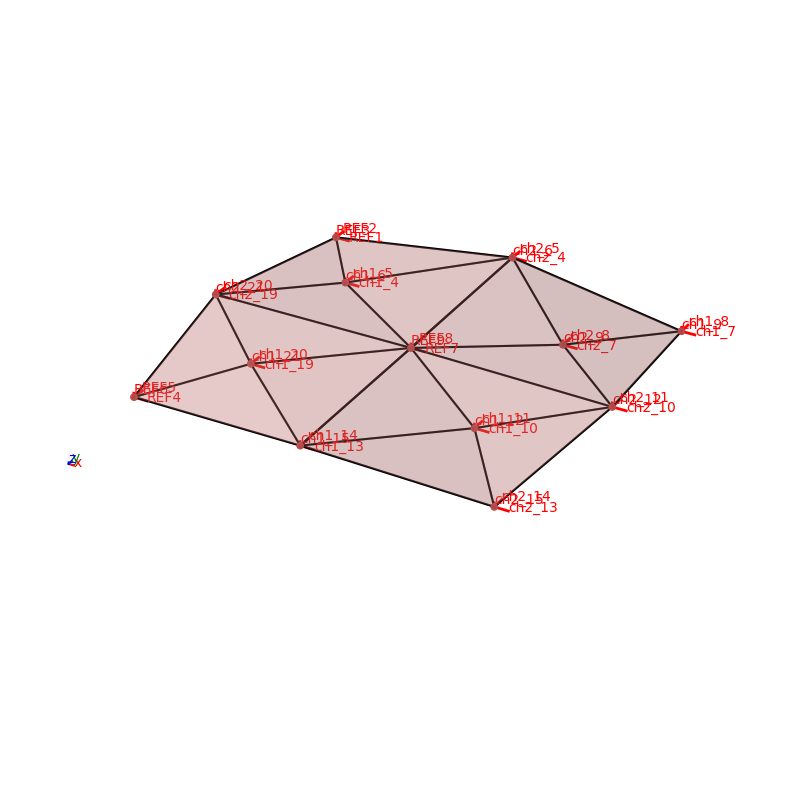

In [92]:
#_, _ = frame_4P.plot_geo1(scaleF=0.1)
_, _ = boveda.plot_geo2_mpl(scaleF=0.1)

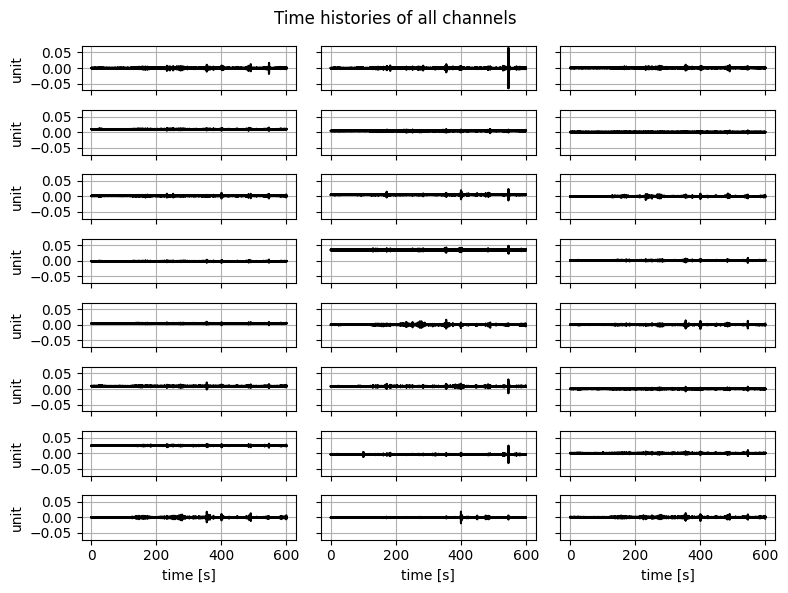

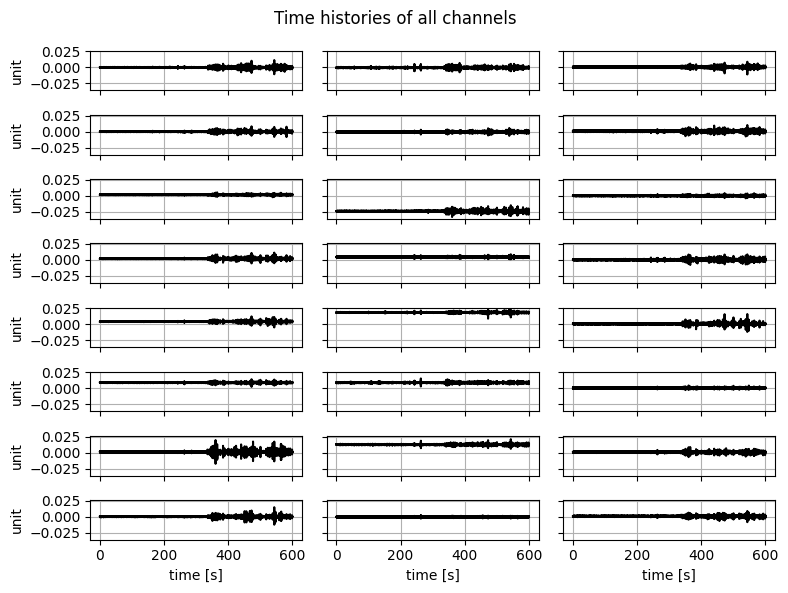

In [93]:
_, _ = boveda.plot_data(nc=3)

In [94]:
boveda.filter_data(Wn=(0.1, 25), order=8, btype="bandpass")
boveda.decimate_data(q=5)
#_, _ = frame_4P.plot_ch_info(ch_idx=[0])

In [95]:
# Initialise the algorithms
ssicov = SSIcov_MS(name="SSIcov", br=80, ordmax=80, calc_unc=True)

# Add algorithms to the class
boveda.add_algorithms(ssicov)
boveda.run_all()

2025-03-20 17:00:24,972 - pyoma2.setup.base - INFO - Running SSIcov... (base:123)
100%|██████████| 81/81 [00:00<00:00, 9722.93it/s]
2025-03-20 17:00:27,747 - pyoma2.functions.ssi - INFO - Calculating modal parameters for increasing model order... (ssi:486)
100%|██████████| 81/81 [00:00<00:00, 178.79it/s]
2025-03-20 17:00:28,588 - pyoma2.setup.base - INFO - all done (base:102)


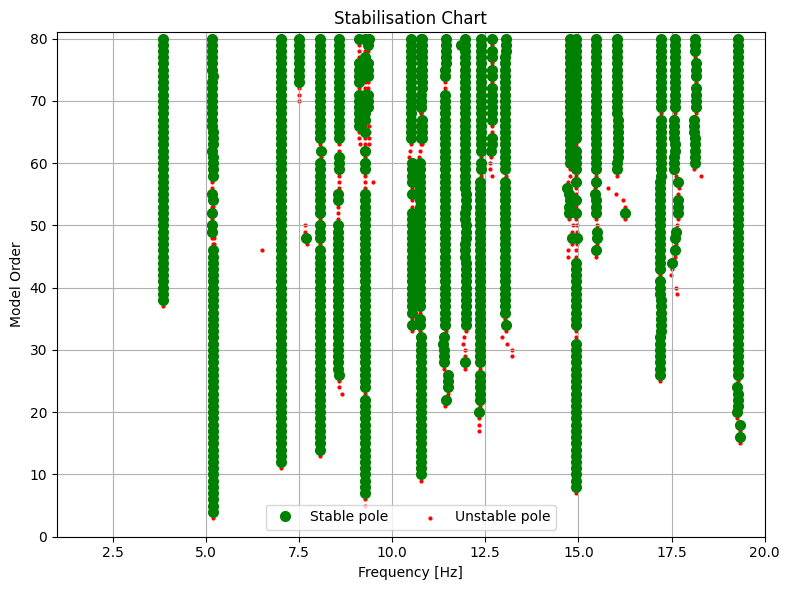

In [100]:
# Plot
_, _ = ssicov.plot_stab(freqlim=(1,20), hide_poles=False)

After the algorithms have been executed we can exctract the desired poles and plot the mode shapes.

2025-03-20 17:00:28,761 - pyoma2.setup.base - INFO - Getting mpe modal parameters from SSIcov (base:149)
2025-03-20 17:00:28,763 - pyoma2.functions.ssi - INFO - Extracting SSI modal parameters (ssi:889)
100%|██████████| 3/3 [00:00<00:00, 4388.88it/s]
c:\Users\joela\Documents\GitHub\joecga4\pyOMA2\src\pyoma2\functions\gen.py:349: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_phi_map = sens_map.replace(mapping).astype(float)
c:\Users\joela\Documents\GitHub\joecga4\pyOMA2\src\pyoma2\functions\gen.py:349: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_dow

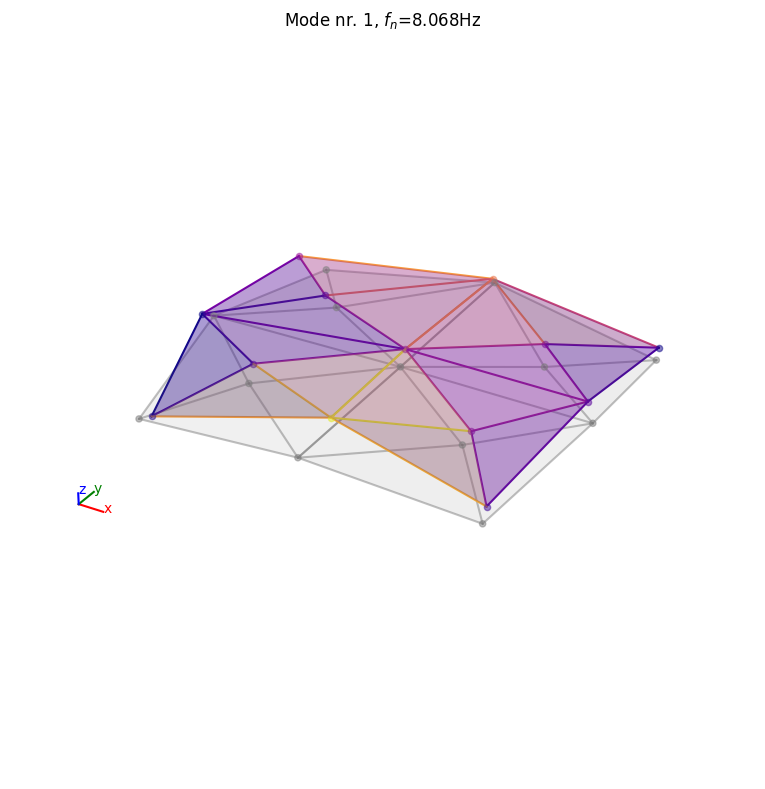

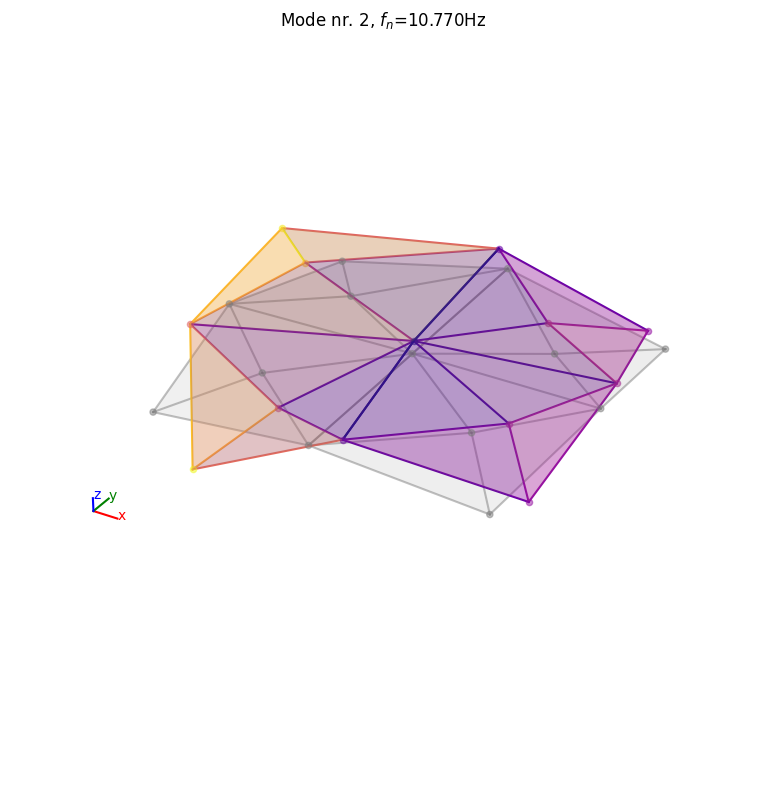

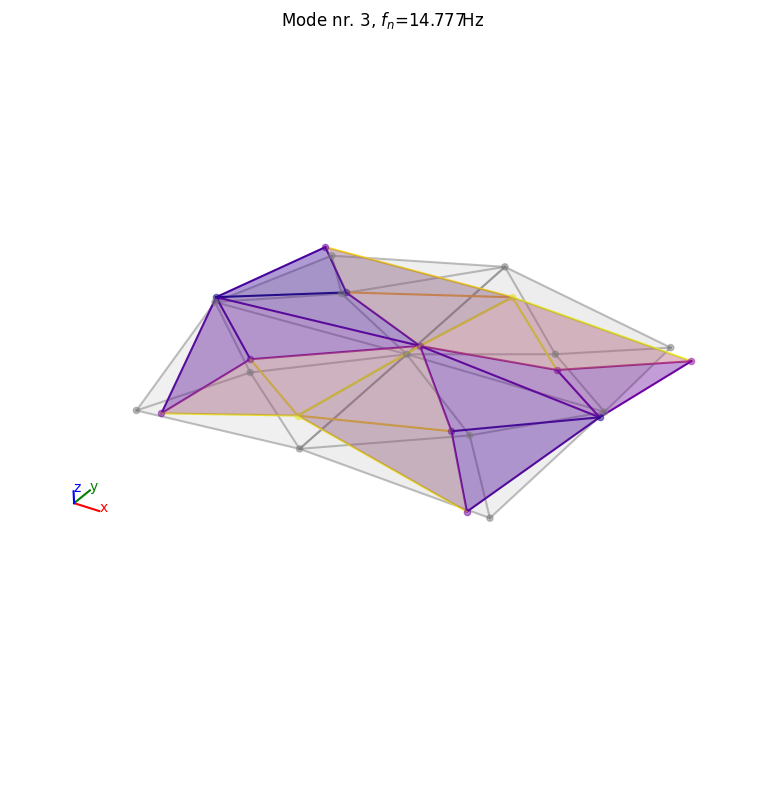

In [97]:
# get modal parameters
boveda.mpe("SSIcov", sel_freq=[8.0, 10.69, 14.32], order_in=80)

# plot mode shapes
_ = boveda.plot_mode_geo2_mpl(algo_res=ssicov.result, mode_nr=1, scaleF=0.5, notebook=True)
_ = boveda.plot_mode_geo2_mpl(algo_res=ssicov.result, mode_nr=2, scaleF=0.5, notebook=True)
_ = boveda.plot_mode_geo2_mpl(algo_res=ssicov.result, mode_nr=3, scaleF=0.5, notebook=True)

In [99]:
ssicov.result.Fn

array([ 8.06786053, 10.77004349, 14.77671353])